In [1]:
import pandas as pd
import numpy as np
import plotly.express as px


In [2]:
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
print(df.columns.tolist())


['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [5]:
df.drop(['id', 'date', 'zipcode'], axis=1, inplace=True)
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


<AxesSubplot:title={'center':'Correlation with price'}>

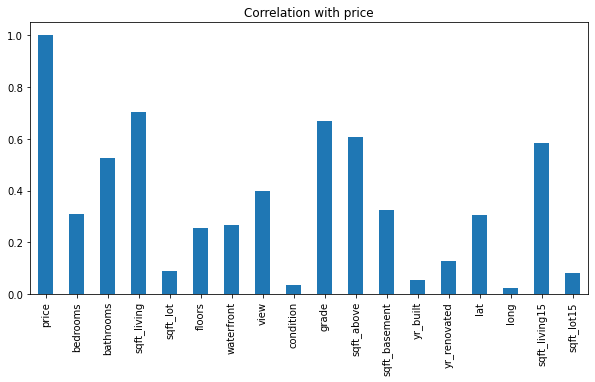

In [6]:
df.corrwith(df['price']).plot.bar(figsize=(10,5), title='Correlation with price')


In [7]:
#X = df[['bathrooms','sqft_living','grade']]
#y  = df['price']    


In [8]:
X = df.drop(['price'], axis=1)
y  = df['price']    

In [9]:
import xgboost as xgb


C:\Users\aishw\miniconda3\envs\digi\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [10]:
data_matrix = xgb.DMatrix(X,y)


C:\Users\aishw\miniconda3\envs\digi\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [11]:
params = {
    'learning_rate' : .01,
    'max_depth' : 15,
    'alpha' : 10,
}

results = xgb.cv(
    params,
    data_matrix,
    num_boost_round=500,
    early_stopping_rounds=5,
    metrics='rmse',
)
results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,646938.562500,2751.464307,647064.708333,5549.481691
1,640897.354167,2735.363615,641164.416667,5581.866734
2,634916.062500,2721.628247,635319.479167,5618.449174
3,628998.604167,2705.581896,629544.250000,5660.534638
4,623139.166667,2691.190960,623825.833333,5694.387530
...,...,...,...,...
495,23087.317708,439.831707,133500.505208,5897.578973
496,23026.392578,436.800879,133490.322917,5888.783066
497,22965.600260,439.308790,133480.947917,5881.124503
498,22901.043620,443.158379,133471.710938,5872.578593


<AxesSubplot:>

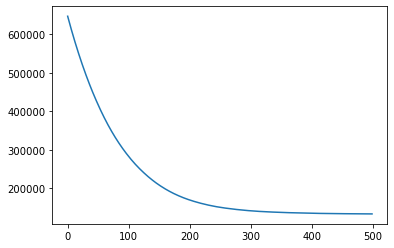

In [12]:
params = {
    'learning_rate' : .01,
    'max_depth' : 15,
    'alpha' : 10,
}

results = xgb.cv(
    params,
    data_matrix,
    num_boost_round=500,
    early_stopping_rounds=5,
    metrics='rmse',
)
results['test-rmse-mean'].plot()


In [14]:
grid_params = [
    (max_depth, learning_rate, alpha)
    for max_depth in range(5,20,5)
    for learning_rate in [.01,.1,.5]
    for alpha in range(0,50,5)
]

min_rmse = float('inf')
best_params = None

for max_depth,learning_rate,alpha in grid_params:
    params = {
        'max_depth' : max_depth,
        'learning_rate' : learning_rate,
        'alpha' : alpha,
    }
    results = xgb.cv(
        params,
        data_matrix,
        num_boost_round=500,
        early_stopping_rounds=5,
        metrics='rmse',
    )
    current_rmse = results['test-rmse-mean'].min()
    if current_rmse < min_rmse:
        min_rmse = current_rmse
        best_params = (max_depth,learning_rate,alpha)
    print(f'Current best params: {best_params}')


Current best params: (5, 0.01, 0)
Current best params: (5, 0.01, 0)
Current best params: (5, 0.01, 0)
Current best params: (5, 0.01, 0)
Current best params: (5, 0.01, 20)
Current best params: (5, 0.01, 20)
Current best params: (5, 0.01, 20)
Current best params: (5, 0.01, 20)
Current best params: (5, 0.01, 20)
Current best params: (5, 0.01, 20)
Current best params: (5, 0.1, 0)
Current best params: (5, 0.1, 5)
Current best params: (5, 0.1, 10)
Current best params: (5, 0.1, 15)
Current best params: (5, 0.1, 20)
Current best params: (5, 0.1, 25)
Current best params: (5, 0.1, 25)
Current best params: (5, 0.1, 25)
Current best params: (5, 0.1, 40)
Current best params: (5, 0.1, 45)
Current best params: (5, 0.1, 45)
Current best params: (5, 0.1, 45)
Current best params: (5, 0.1, 45)
Current best params: (5, 0.1, 45)
Current best params: (5, 0.1, 45)
Current best params: (5, 0.1, 45)
Current best params: (5, 0.1, 45)
Current best params: (5, 0.1, 45)
Current best params: (5, 0.1, 45)
Current be

In [15]:
best_params

(5, 0.1, 45)

FINAL RUN

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=.3,random_state=1234)

In [18]:
train_matrix = xgb.DMatrix(xtrain,ytrain)
test_matrix = xgb.DMatrix(xtest,ytest)



C:\Users\aishw\miniconda3\envs\digi\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [19]:
model = xgb.train(
     params,
     train_matrix,
     num_boost_round=500,
     early_stopping_rounds=5,
     evals=[(test_matrix,'test')],
)
model.save_model('kc_house_model.xgb')

[0]	test-rmse:364900.34375
[1]	test-rmse:231506.31250
[2]	test-rmse:178504.57812
[3]	test-rmse:155807.18750
[4]	test-rmse:146723.70312
[5]	test-rmse:142309.54688
[6]	test-rmse:140395.48438
[7]	test-rmse:139638.32812
[8]	test-rmse:139080.15625
[9]	test-rmse:138931.87500
[10]	test-rmse:138785.06250
[11]	test-rmse:138656.35938
[12]	test-rmse:138660.53125
[13]	test-rmse:138643.26562
[14]	test-rmse:138611.26562
[15]	test-rmse:138613.95312
[16]	test-rmse:138659.71875
[17]	test-rmse:138630.65625
[18]	test-rmse:138627.18750


load save model

In [20]:
saved_model = xgb.Booster()
saved_model.load_model('kc_house_model.xgb')

In [21]:
X.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639


In [22]:
saved_model.predict(xgb.DMatrix(X.head(2)))

C:\Users\aishw\miniconda3\envs\digi\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


array([224313.67, 544113.2 ], dtype=float32)

In [23]:
y[:2]

0    221900.0
1    538000.0
Name: price, dtype: float64

In [24]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

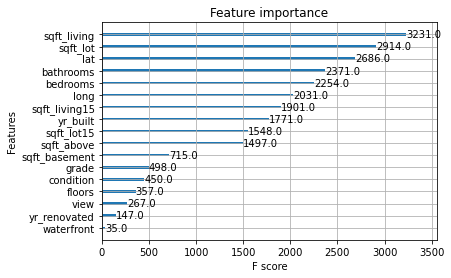

In [26]:
#f,a = plt.subplots(figsize=(10,15))
xgb.plot_importance(model) # tells us which features are important

In [27]:
df['pred']=saved_model.predict(xgb.DMatrix(X))
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,pred
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,224313.671875
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,544113.187500
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,185334.812500
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,597583.875000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,511245.343750


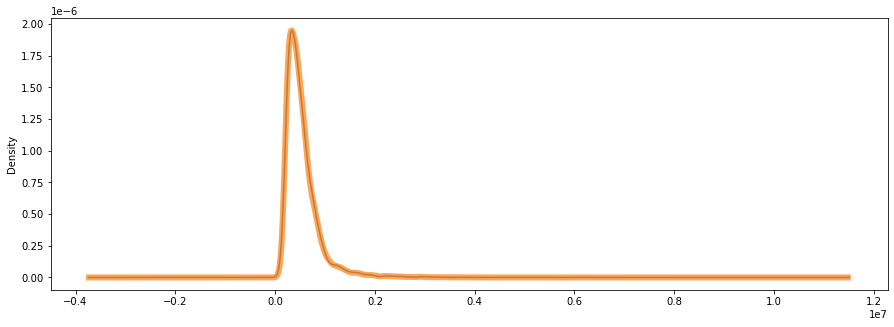

In [28]:
ax = df['price'].plot.kde(label='Actual',figsize=(15,5))
df['pred'].plot.kde(ax=ax,linewidth=6,label='Predicted',alpha=.7)
plt.show()